# Project 1
### 8/10 perfect solutions required for full score

These exercises should be done on a computer using Python. 	Please submit a Jupyter-notebook, containing both your code and the report in the same file. Provide properly commented code.

Some of the tasks involve sparse matrices, to obtain efficient code it is preferable to work with sparse matrices using for example the library `sparse` of  `scipy`. In these exercises you are allowed to work with full matrices if you find it easier, but make sure that the comparisons of the various methods in your implementations, e.g. when comparing running times, are fair. Be explicit about these issues in your report.

**You will need an additional Python library for this project:** The library `autograd` will be used to compute the numerical Jacobian. You can install this with `pip install autograd`, `pip3 install autograd` or `conda install autograd` depending on your setup.

In [105]:
import autograd.numpy as np
from autograd import jacobian
import matplotlib.pyplot as plt
import decimal as dec

## 1 - Propagation of rounding errors
The following exercise illustrates the effects of propagation of rounding errors in a numerical algorithm.

 
We want to make a program to approximate the derivative of a differentiable function $f:\mathbb{R} \rightarrow \mathbb{R}$. We use the following approximation called "central difference"

$$f'(x)=\frac{f(x+\Delta x/2)-f(x-\Delta x/2)}{\Delta x}+\mathcal{O}((\Delta x)^2),\qquad f'(x)\approx \frac{f(x+\Delta x/2)-f(x-\Delta x/2)}{\Delta x}.$$

1. Use a Taylor expansion to prove that the error given by this approximation is indeed $\mathcal{O}((\Delta x)^2)$. 



Let $ h=\frac{\Delta x}{2} $

Then we have

$$f(x+h) \ = \ \sum_{k=0}^{\infty} \frac{h^k}{k!} f^{(k)}(x) \ = \ f(x) + hf'(x) + \frac{h^2}{2!} f^{(2)}(x) + \frac{h^3}{3!} f^{(3)}(x) + \frac{h^4}{4!} f^{(4)}(x) + ... 
$$

and

$$f(x-h) \ = \  \sum_{k=0}^{\infty} \frac{(-h)^{k}}{k!} f^{(k)}(x) \ = \ f(x) - hf'(x) + \frac{h^2}{2!} f^{(2)}(x) - \frac{h^3}{3!} f^{(3)}(x) + \frac{h^4}{4!} f^{(4)}(x) + ... $$ 

By taking their difference we get 

$$ f(x+h)-f(x-h) = 2hf'(x) + \frac{2h^{3}}{3!}f^{(3)}(x) + \sum_{k=2}^{\infty} \frac{2h^{2k+1}}{(2k+1)!} f^{(2k+1)}(x) $$ 


Now let $ g(x) = h^3, \quad$ and $\quad r(x) = \frac{2h^{3}}{3!}f^{(3)}(x) + \sum_{k=2}^{\infty} \frac{2h^{2k+1}}{(2k+1)!} f^{(2k+1)}(x) \quad$  
and note

$$ \frac{|r(x)|}{|g(x)|} = \frac{\bigg | \frac{2h^{3}}{3!}f^{(3)}(x) + \sum_{k=2}^{\infty} \frac{2h^{2k+1}}{(2k+1)!} f^{(2k+1)}(x) \bigg |}{|h^3|}  
= \bigg | \frac{1}{3} f^{(3)}(x) + \sum_{k=2}^{\infty} \frac{2h^{2k-2}}{(2k+1)!} f^{(2k+1)}(x) \bigg |
 \rightarrow \frac{1}{3} |f^{(3)}(x)| = M \text{ \quad for some nonnegative constant } M \in \mathbb{R} \text{\hspace{0.5em} as h} \rightarrow 0 $$

Since $ |r(x)| \le M|g(x)| $ we have by the definition of Big O Notation that $$ r(x) = \mathcal{O}(g(x)) = \mathcal{O}(h^3) $$  

Therefore
$$ f(x+h) - f(x-h) = 2hf'(x) + \mathcal{O}(h^3) \\[10pt]
\frac{f(x+h)-f(x-h)}{2h} = f'(x) + \mathcal{O}(h^2) \\[10pt] 
f'(x) = \frac{f(x+h)-f(x-h)}{2h} - \mathcal{O}(h^2)
$$

Substituting h back we get $$ f'(x) = \frac{f(x+ \Delta x/2)-f(x-\Delta x/2)}{\Delta x} - \mathcal{O}((\Delta x/2)^2) $$ 
We can change the sign of the big Oh and take the constant out as they do not change the order of the function
$$ - \mathcal{O}((\Delta x/2)^2) = \mathcal{O}(\frac{1}{4}(\Delta x)^2) = \mathcal{O}((\Delta x)^2)$$

Thus we have $$ f'(x) = \frac{f(x+ \Delta x/2)-f(x-\Delta x/2)}{\Delta x} + \mathcal{O}((\Delta x)^2) $$

Now we see that the error given by the central difference approximation, denoted by $\hat{f}'(x)$ is as claimed.

$$ | f'(x) - \hat{f}'(x) | =
 \bigg | \frac{f(x+ \Delta x/2)-f(x-\Delta x/2)}{\Delta x} + \mathcal{O}((\Delta x)^2) - \frac{f(x+ \Delta x/2)-f(x-\Delta x/2)}{\Delta x} \bigg | 
= | \mathcal{O}((\Delta x)^2) | = \mathcal{O}((\Delta x)^2) $$



We now take $f(x)=\exp(x^3-2)$, and use the formula above to approximate 

$$\left.\frac{d}{dx}\exp (x^3-2)\right|_{x=\frac{\pi}{3}}.$$

2. Make a simple Python program to compute the absolute error of the approximation for decreasing values of $\Delta x$, e.g $\Delta x=\frac{1}{2^k}$ for $k=1,2,\dots , N$, choosing a value of $N$ between $30$ and $40$.
Plot the results (values of $\Delta x$ versus the corresponding absolute error) in a logarithmic scale.



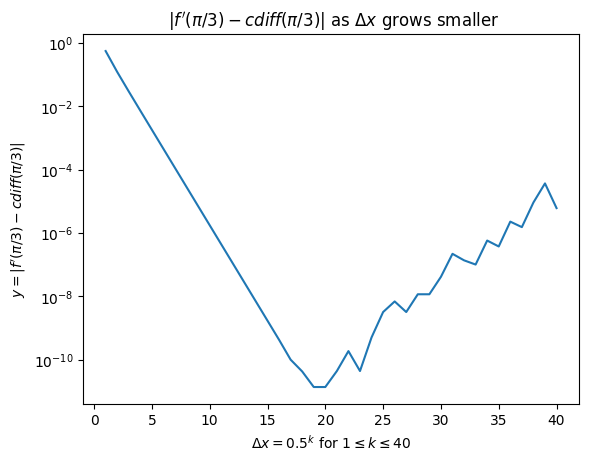

In [106]:
# Your code
import math

# Let f(x) = e^(x^3 - 2) and df its derivative

def f(x):
    return math.exp(x**3 - 2)

def df(x):
    return 3*x**2 * f(x)

# cdiff returns the central difference approximation of some function evaluated at x, and with the difference given by h^k for some real numbers h and k.
def cdiff(func,h, x, k=1):
    return (func(x + h**k / 2) - func(x - h**k / 2)) / h**k

# We collect the powers of h = 0.5^k in a list called "x" such that we get x = [1,2,...,40] and the absolute difference between df and cdiff with for corresponding h in y[] 
x = []
y= []

for k in range(1,41):
    x.append(k)
    y.append((abs(df(math.pi/3) - cdiff(f,0.5,math.pi/3,k))))

# We plot the list named x along the x-axis and the list named y along y axis with the y axis scaled logarithmically

plt.plot(x,y)
plt.title(r" $ |f'(\pi/3) - cdiff(\pi/3)|$ as $\Delta x$ grows smaller")
plt.xlabel(r"$\Delta x = 0.5^k$ for $ 1 \leq k \leq 40 $")
plt.ylabel(r"$ y = |f'(\pi/3) - cdiff(\pi/3)| $")
plt.yscale("log")

You should see in your plot that for very small values of $\Delta x$ the error starts to increase, compromising the convergence of the approximation method. This is due to the propagation of rounding error. The results improve if we can compute our formulae with a higher precision.

3. In this exercise you should learn how to use the library `decimal` in Python in order to perform the calculations of the previous experiment with higher precision. 
Consider the same parameters used in the previous experiment ($\Delta x=\frac{1}{2^k}$ for $k=1,2,\dots , N$ and same $N$ as above), increase the level of precision (look up `getcontext().prec` in the `decimal` library) and produce a plot which does not show the effects of propagation of rounding errors.

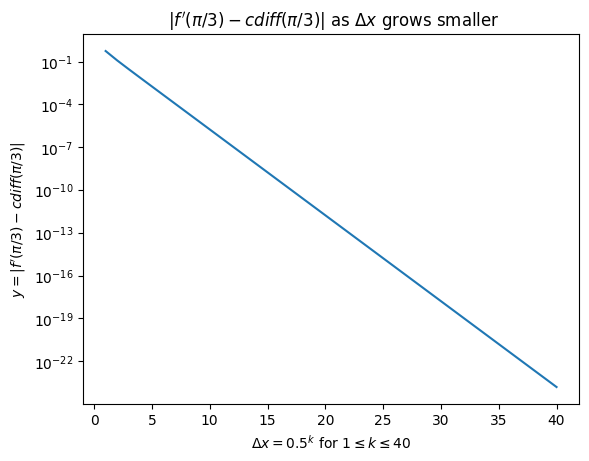

In [107]:
# Your code
from decimal import Decimal as D
from decimal import getcontext

getcontext().prec = 1000

def pi():
    """Compute Pi to the current precision.

    >>> print(pi())
    3.141592653589793238462643383

    """
    getcontext().prec += 2  # extra digits for intermediate steps
    three = D(3)      # substitute "three=3.0" for regular floats
    lasts, t, s, n, na, d, da = 0, three, 3, 1, 0, 0, 24
    while s != lasts:
        lasts = s
        n, na = n+na, na+8
        d, da = d+da, da+32
        t = (t * n) / d
        s += t
    getcontext().prec -= 2
    return +s

# Let f(x) = e^(x^3 - 2) and df its derivative

def f(x):
    return D(D(x)**D(3) - D(2)).exp()

df = D(D(3)*(pi()/D(3))**D(2) * D((pi()/D(3))**D(3) - D(2)).exp())

# cdiff returns the central difference approximation of a function with a difference h^k, evaluated at x

def cdiff(func, h, x, k):
    return (f(D(x) + D(h)**D(k) /D(2)) - f(D(x) - D(h)**D(k) /D(2))) / D(h)**D(k) 

# We collect the powers of h = 0.5^k in a list called "x" such that we get x = [1,2,...,40] and the absolute difference between df and cdiff with for corresponding h in y[] 

x = []
y = []

for k in range(1,41):
    x.append(k)
    y.append(D(df - cdiff(f,0.5,pi()/D(3),k)).copy_abs())

# We plot the list named x along the x-axis and the list named y along y axis with the y axis scaled logarithmically

plt.plot(x,y)
plt.title(r" $ |f'(\pi/3) - cdiff(\pi/3)|$ as $\Delta x$ grows smaller")
plt.xlabel(r"$\Delta x = 0.5^k$ for $ 1 \leq k \leq 40 $")
plt.ylabel(r"$ y = |f'(\pi/3) - cdiff(\pi/3)| $")
plt.yscale("log")




4. Use the above formula, with $\Delta x = \frac{1}{2^{40}}$ to estimate

$$  \exp(t)=\frac{d}{dx}\exp(x)|_{x=t}   $$

for $t=\frac{1}{2^N}$ with $N=0,\dots,10$. Plot the error.

Text(0, 0.5, '$ y = |e^{t} - cdiff(e^{t})| $')

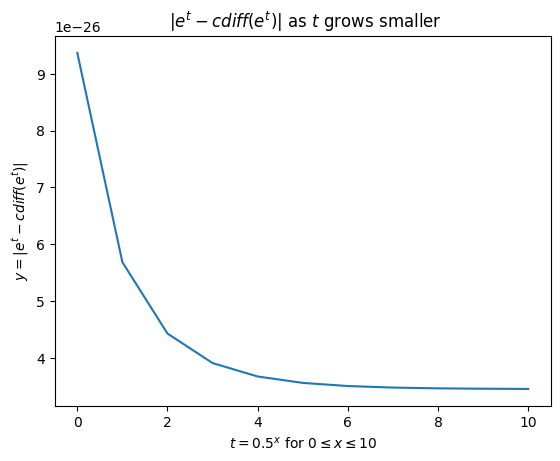

In [108]:
# Your code

# Let f(x) = e^(x)

def f(x):
    return D(x).exp()

# cdiff returns the central difference approximation of some function evaluated at x, and with the difference given by h^k for some real numbers h and k.

def cdiff(func, h, x, k):
    return (f(D(x)**D(k) + D(h)/D(2)) - f(D(x)**D(k) - D(h)/D(2))) / D(h) 

# We collect the powers of h = 0.5^k in a list called "x" such that we get x = [1,2,...,40] and the base 10 logarithm of the
# absolute difference between df and cdiff with the correspdoning h in y[]

x = []
y = []

for k in range(0,11):
    x.append(k)
    y.append(D(f(D(0.5)**D(k)) - cdiff(f,D(0.5)**D(40),D(0.5),k)).copy_abs())

# We plot the x[] along the x-axis and y[] along y axis

plt.plot(x,y)
plt.title(r" $ |e^{t} - cdiff(e^{t}) |$ as $t$ grows smaller")
plt.xlabel(r"$ t = 0.5^x $ for $ 0 \leq x \leq 10 $")
plt.ylabel(r"$ y = |e^{t} - cdiff(e^{t})| $")


# 2 - Newton's method

In this exercise, we will make use of the `autograd` package. As we have done at the start of this noteobook, when using this package you must `import` Numpy using `autograd.numpy`. We use the `jacobian` function, which approximates the jacobian of functions between Numpy arrays. See the following example.

$$ F(x_1, x_2) = (x_1 + x_2, x_1x_2)$$

In [109]:
def F_0(x):
    return np.array([x[0] + x[1], x[1]*x[0]])

# Computing the numerical Jacobian
DF = jacobian(F_0)
# Testing our function
x = np.array([3.0, 1.0])
print(DF(x))

[[1. 1.]
 [1. 3.]]




1. You are given the following function:
$$
    F(x_1, x_2) = (3x_1 + x_1x_2 - 5, x_2^2 - x_1 + 1)
$$
  - Using the package `autograd` for automatic differentiation to compute Jacobians, create a function `newton` which implements Newton's method for systems of nonlinear equations $F(\mathbf{x})=0$.
  - Apply the method to $F$. These numerical experiments should give evidence that Newton's method converges for these two problems.
  - Choose an initial value close enough in $\infty$-norm to one solution of the system. Plot the values of $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_{\infty}$ and $\|F(\mathbf{x}_k)\|_{\infty}$ for each iteration  $k=0,1,\dots, K-1$ where $K$ is the total number of iterations (choose $K$ large enough to make a detailed plot). Use a semi-logarithmic scale on the y-axis (`semilogy` in matplotlib). 
  - Your answer is your code and a pair of figures with comments in text about what the figures show and what they can tell you about the convergence.

In [110]:
# Your Newton method implementation
from autograd.numpy.linalg import inv

def newton(F, x0, K):
    '''
    Implements the Newton root finding method for systems of equations.
    
    --Parameters--
    F: function 
        N-array to N-array function
    x0: N-array
        Initial guess
    K: integer
        total number of iterations
    
    --Outputs--
    N-array
        Approximation to solution of F(y)=0
    '''
    JF = jacobian(F)                     # Jacobian of F
    x = x0                               # Saves a copy of x0. Will be used later for storing the iteratives and to return the final iterative.
    list1 = []                           # List of || x_(k+1) - x_(k) || for k = 0,1,...,K-1 wrt. L-infty norm. NOTE: Hereinafter ||.|| refers to L-infty norm until stated otherwise.
    list2 = []                           # List of || F(x_k) || for k = 1,...,K. NOTE: k is 1 to K instead of 0 to K-1.
    list2.append(max(abs(F(x))))

    for k in range(K):
        xcopy = np.copy(x0)              # We save a copy of x0 for when we need to calculate ||x_(k+1) - x_k||
        x -= inv(JF(x)) @ F(x)           # Iterates x
        list1.append(max(abs(x-xcopy)))  # Computes ||x_(k+1) - x_k|| and stores it in in list1 
        list2.append(max(abs(F(x))))     # Computes ||F(x_k)|| and sotres it in list2

    # We plot the values of the two norms and scale the y axis logarithmically. 
     
    plt.plot(range(len(list1)),list1, label = r"$||x_{k+1} - x_{k}||_{\infty}$")
    plt.plot(range(len(list2)), list2, label = r"$||F(x_{k})||_{\infty}$")
    plt.legend(loc="best")
    plt.yscale("log")

    return x

[1.38196601 0.61803399] [0. 0.]


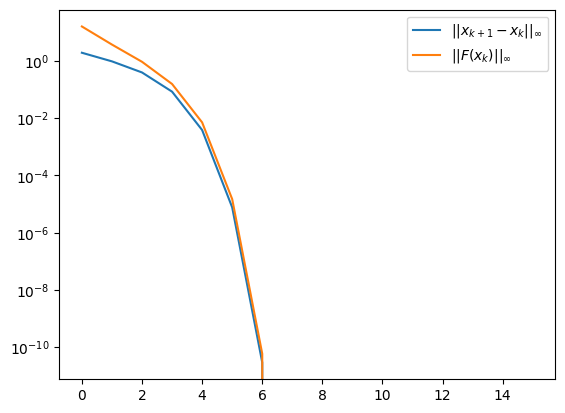

In [111]:
# Apply the method to your function

# Let F(x) be the function given in the problem question. 

def F(x):
    return np.array([3*x[0] + x[0]*x[1] - 5, x[1]**2 - x[0] + 1])

# We choose initial vector x0

x0 = np.array([3.0, 4.0])

# We apply Newton's method t F and store the last iterative as alpha, while also plotting ||x_(k+1) - x_(k)|| and ||F(x)|| for each iterative.

alpha = newton(F,x0,15)

# To verify that alpha is a root of F, we evaluate F at alpha.

print(alpha, F(alpha))

# By visual inspection it looks like if the iteration converges then the two values converge at least quadratically once they are sufficiently close a root
# By extension, perhaps ||F(x_(k))|| can be used to approximate the speed of convergence.

2. Use the implemented Newton method and implement a stopping criterion.
As stopping criterion, you should use a maximum number of iterations as well as two tolerances $TOL_1$ and $TOL_2$ such that the iteration is stopped whenever $\|F(\mathbf{x}^k)\|_{\infty}\le TOL_1$ and $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_{\infty}\le TOL_2$. 
Provide numerical evidence that your code works as it should by  printing the values $\|F(\mathbf{x}^k)\|_{\infty}$ for each iteration , and making a plot of $\|F(\mathbf{x}^k)\|_{\infty}$, $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_{\infty}$, for all $k$.



In [112]:
# Implement your method with a stopping criterion
def newton2(F, x0, maxIter, TOL_1, TOL_2):

    JF = jacobian(F)
    x = x0                                       # Saves a copy of x0. Will be used later for storing the iteratives and to return the final iterative.
    list1 = []                                   # List of || x_(k+1) - x_(k) || for k = 0,1,...,K-1 wrt. L-infty norm.
    list2 = []                                   # List of || F(x_k) || for k = 0,...,K-1.   
    list2.append(max(abs(F(x))))                                 
    print(f"{f'x0 = {x}' : <50}{f'F(x0) = {F(x)}' : <50}{f'||F(x0)|| = {max(abs(F(x)))}' : <50}")

    for k in range(maxIter):
        xcopy = np.copy(x)                       # Storage for iterations of x
        x -= inv(JF(x)) @ F(x)                   # Iterates x
        list1.append(max(abs(x-xcopy)))          # Stores ||x_(k+1) - x_k|| in list1
        list2.append(max(abs(F(x))))             # Stores ||F(x_k)|| in list2
        print(f"{f'x{k+1} = {x}' : <50}{f'F(x{k+1}) = {F(x)}' : <50}{f'||F(x{k+1})|| = {max(abs(F(x)))}' : <50}")
        if max(abs(F(x))) <= TOL_1:
            if max(abs(x-xcopy)) <= TOL_2:
                break

    plt.plot(range(len(list1)),list1, label = r"$||x_{k+1} - x_{k}||_{\infty}$")
    plt.plot(range(len(list2)), list2, label = r"$||F(x_{k})||_{\infty}$")
    plt.legend(loc="best")
    plt.yscale("log")                            # Semilogy scales Y


x0 = [2. 2.]                                      F(x0) = [5. 3.]                                   ||F(x0)|| = 5.0                                   
x1 = [1.36363636 1.09090909]                      F(x1) = [0.5785124  0.82644628]                   ||F(x1)|| = 0.8264462809917354                    
x2 = [1.35049288 0.70609712]                      F(x2) = [0.00505777 0.14808026]                   ||F(x2)|| = 0.1480802562368695                    
x3 = [1.37978089 0.6219782 ]                      F(x3) = [-0.00246368  0.00707599]                 ||F(x3)|| = 0.007075991405071536                  
x4 = [1.38196054 0.6180421 ]                      F(x4) = [-8.57932459e-06  1.54929233e-05]         ||F(x4)|| = 1.5492923342019793e-05                
x5 = [1.38196601 0.61803399]                      F(x5) = [-4.4349413e-11  6.5764949e-11]           ||F(x5)|| = 6.576494904209085e-11                 
x6 = [1.38196601 0.61803399]                      F(x6) = [0. 0.]                             

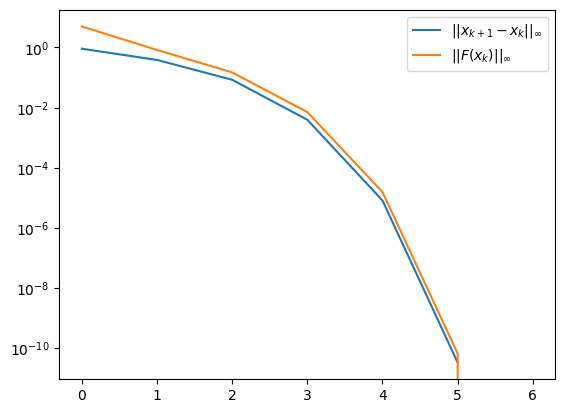

In [113]:
# Your code here

x0 = np.array([2.0, 2.0])

newton2(F,x0,10,10**(-10),10**(-10))

Answer: 

3. Use newtons method to make a function that calculates a n-th root of a 2x2 matrix $A$. That is, a function that solves $X^n = A$.

- Confirm numerically that your implementation is correct.

**Hint**. Can you reinterpret the function $F(X) = X^n - A$ as a function between arrays? 

In [4]:
# Your code here
from autograd import jacobian
from autograd.numpy.linalg import inv
import autograd.numpy as np
from autograd.numpy.linalg import matrix_power


# We write a 2x2 matrix A as a 4d array s.t. A = [a_11, a_12, a_21, a_22] and we want to find the nth root of A.

n = 3
A = np.array([32,32,32,32])

# F(X) = X^n - A, but with the 2x2 matrices X and A represented as 4d arrays. The for loop maps x to x * x where * is matrix multiplication, and stores x^2 as Xn. Then it multiplies Xn with x again, producing x^3, storing it as Xn. 
# This process is repeated n-1 times s.t. the components of the final Xn are identical to the entries of the 2x2 matrix X^n

def F(x):
    Xn = x
    for i in range(n-1):
        Xn = np.array([Xn[0]*x[0] + Xn[1]*x[2], Xn[0]*x[1] + Xn[1]*x[3], Xn[2]*x[0] + Xn[3]*x[2], Xn[2]*x[1] + Xn[3]*x[3]])
    return Xn - A

DF = jacobian(F)

# Returns the Kth iterative of a 4d vector. Also stores the number of iterations as P.

P = 0
def newton3(x, K):
    global P
    P = K
    xk = np.array(x)
    for i in range(K):
        xk -= inv(DF(xk)) @ F(xk)
    return xk

x0 = np.array([1.0, 1.0, 1.0, 1.0])

# Reshaping the final iterative and A back into a 2x2 matrix and rounding the entries.
B = newton3(x0, 50).reshape(2,2).round(4)
A = A.reshape(2,2)

print(f"We wanted to find the {n}. root of A = \n {A} \n")
print(f"The initial matrix was x0 =  \n {x0.reshape(2,2)} \n \n After {P} iterations, the Newton's method returned the matrix B = \n {B} \n ")
print(f" Now we check if B is a root of F. F(B) = B^({n}) - A = \n {(matrix_power(B,n) - A)} ")


We wanted to find the 3. root of A = 
 [[32 32]
 [32 32]] 

The initial matrix was x0 =  
 [[1. 1.]
 [1. 1.]] 
 
 After 50 iterations, the Newton's method returned the matrix B = 
 [[2. 2.]
 [2. 2.]] 
 
 Now we check if B is a root of F. F(B) = B^(3) - A = 
 [[0. 0.]
 [0. 0.]] 


4. Think of a good way of verifying numerically that the convergence of the Newton iteration is quadratic. 
- Your answer is the code that does the verification, the evidence it produces and an explanation of why it is evidence for quadratic convergence.

**Hint**. You should consider a problem for which you know the solution or alternatively generate a reference solution (i.e. an approximation with *very* high accuracy). Use the definition of quadratic convergence. You can also compute the jacobian exactly (by hand) to eliminate the error from that part of the process.

For a differentiable function $F$ with $F(\xi) = 0$, Taylor's theorem tells us that 

$$ \begin{align*}
F(a) &= F(\xi) + F'(\xi)(a-\xi) + h_1(a)(a-\xi), \quad \lim_{a\to \xi} h_1(a) = 0\\
&\approx F'(\xi)(a-\xi) \end{align*}
$$.


If $F'(\xi) \neq 0 $, we can substitute in $a_1=x_{k+1}$ and $a_2 = x_{k}$ 
we get $$ \frac{||F(a_1)||_\infty}{||F(a_2)||^2_\infty} = \frac{||F(x_{k+1})||_\infty}{||F(x_k)||^2_\infty} \approx \frac{||x_{k+1}-\xi ||_\infty}{||x_k - \xi ||^2_\infty}$$

We use this approximation to verify that the convergence of the Newton iteration on the function $F$ from problem 2.2
$$
    F(x_1, x_2) = (3x_1 + x_1x_2 - 5, x_2^2 - x_1 + 1)
$$

is quadratic

 Applying Newton's method to F with initial vector [1000. 2000.] the vector iterates to a point alpha = [1.38196601 0.61803399], and F evaluated at alpha returns [0. 0.]


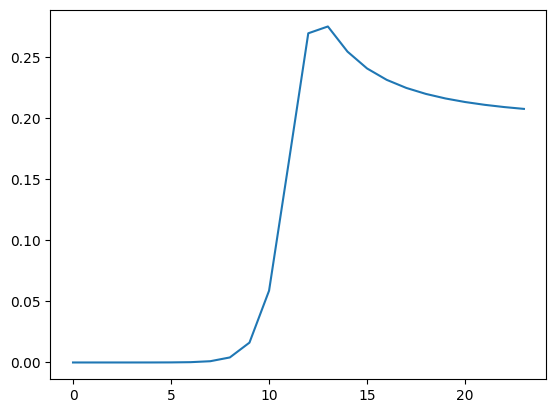

In [8]:
# Your Code Here
import numpy as np
from decimal import Decimal as D 
import matplotlib.pyplot as plt
from decimal import getcontext
from numpy.linalg import norm
getcontext().prec = 10000

def F(x):
    return np.array([D(3)*D(x[0]) + D(x[0])*D(x[1]) - D(5), D(x[1])**D(2) - D(x[0]) + D(1)])

# We find the exact inverse of the Jacobian of F by hand so that we can use the decimal library.  
def JFinv(x):
    return np.array( [ [ (D(2)*D(x[1])) / ( D(2) * D(x[1]) * ( D(3) + D(x[1]) ) + D(x[0]) ), -D(x[0]) / ( D(2) * D(x[1]) * ( D(3) + D(x[1]) ) + D(x[0]) ) ] , [ D(1) / ( D(2) * D(x[1]) * ( D(3) + D(x[1]) ) + D(x[0]) ) , (D(3) + D(x[1])) / ( D(2) * D(x[1]) * ( D(3) + D(x[1]) ) + D(x[0]) ) ] ] )

# Initial vector
x0 = np.array([D(1000), D(2000)])

# Applies Newton's method with our predefined function F, inverse jacobian JFinv, initial vector x0 and number of iterations N.
def newton4(F, JFinv, x0, N):

    xk = np.copy(x0) 
    # Sequence of x_k in list1
    list1 = [] 
    list1.append(np.copy(xk))
    for n in range(N):
        xk -= JFinv(xk) @ F(xk)
        list1.append(np.copy(xk))
    return list1

# The sequence of x_k
xklist = newton4(F, JFinv, x0, 100)

# The sequence ||F(x_(k+1))|| / ||F(x_k)||^2 which is used to approximate the rate of convergence
fnorms = [ norm( F(xklist[i+1]), np.inf) / ( norm( F(xklist[i]),np.inf)**2 ) for i in range(len(xklist)-1)]

alpha = xklist[-1]
print(f" Applying Newton's method to F with initial vector {x0.astype(float)} the vector iterates to a point alpha = {alpha.astype(float)}, and F evaluated at alpha returns {F(alpha).astype(float)}")
plt.plot(np.arange(len(fnorms)), fnorms)

Answer: 

From this plot we see that our sequence $ \frac{||f(x_{k+1})||_\infty}{||f(x_k)||^2_\infty} $ suggests that the sequence $ \frac{||x_{k+1}-\xi ||_\infty}{||x_k - \xi ||^2_\infty}  \rightarrow \mu > 0 $ with order $ q = 2 $ as k is growing larger upto our tolerance or until the program does not register the difference between the value of $ ||F(x_{k+1})||_\infty $  and zero any more.